## Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

import vectorbt as vbt
from datetime import datetime

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## Verificando estrutura do data frame

In [3]:
#definindo nome da carteira teorica que será utilizada
carteira_teorica = 'ibov'
url = f'../result/db_ct_{carteira_teorica}_mod_setor.csv'

In [4]:
#abrindo o arquivo .csv
df = pd.read_csv(url)

In [5]:
#verificando nome das colunas
df.columns

Index(['ATIVO', 'NOME_EMPRESA', 'TIPO', 'QTD_TEORICA', 'PORC_PART', 'setor',
       'sub_setor', 'segmento', 'REDUTOR', 'PROPORCAO_QTD', 'DATA_REF',
       'DATE_UPDATE', 'CARTEIRA_TEORICA'],
      dtype='object')

In [6]:
#verificando setor
df['setor'].unique()

array(['petroleo_gas_e_biocombustiveis', 'consumo_ciclico',
       'consumo_nao_ciclico', 'OTHERS', 'bens_industriais', 'financeiro',
       'materiais_basicos', 'utilidade_publica', 'saude',
       'tecnologia_da_informacao', 'comunicacoes'], dtype=object)

In [7]:
#verificando sub-setor
df['sub_setor'].unique()

array(['petroleo_gas_e_biocombustiveis', 'tecidos_vestuario_e_calcados',
       'bebidas', 'OTHERS', 'transporte', 'servicos_financeiros_diversos',
       'intermediarios_financeiros', 'previdencia_e_seguros',
       'exploracao_de_imoveis', 'mineracao', 'quimicos',
       'alimentos_processados', 'comercio_e_distribuicao',
       'energia_eletrica', 'diversos', 'viagens_e_lazer',
       'construcao_civil', 'material_de_transporte',
       'servicos_medico__hospitalares_analises_e_diagnosticos',
       'siderurgia_e_metalurgia', 'produtos_de_uso_pessoal_e_de_limpeza',
       'comercio', 'madeira_e_papel', 'programas_e_servicos',
       'computadores_e_equipamentos', 'agua_e_saneamento', 'agropecuaria',
       'telecomunicacoes', 'maquinas_e_equipamentos'], dtype=object)

In [8]:
#verificando as primeiras linhas do df
df.head()

,ATIVO,NOME_EMPRESA,TIPO,QTD_TEORICA,PORC_PART,setor,sub_setor,segmento,REDUTOR,PROPORCAO_QTD,DATA_REF,DATE_UPDATE,CARTEIRA_TEORICA
0,RRRP3,3R PETROLEUM,ON NM,200372163,0.336,petroleo_gas_e_biocombustiveis,petroleo_gas_e_biocombustiveis,exploracao_refino_e_distribuicao,1.860243e+07,10.771290,2022-08-11,2022-08-11,CARTEIRA_TEORICA_B3_IBOV
1,ALPA4,ALPARGATAS,PN N1,201257220,0.193,consumo_ciclico,tecidos_vestuario_e_calcados,calcados,1.860243e+07,10.818868,2022-08-11,2022-08-11,CARTEIRA_TEORICA_B3_IBOV
2,ABEV3,AMBEV S/A,ON,4380195841,3.238,consumo_nao_ciclico,bebidas,cervejas_e_refrigerantes,1.860243e+07,235.463645,2022-08-11,2022-08-11,CARTEIRA_TEORICA_B3_IBOV
3,AMER3,AMERICANAS,ON NM,596875824,0.427,OTHERS,OTHERS,OTHERS,1.860243e+07,32.085907,2022-08-11,2022-08-11,CARTEIRA_TEORICA_B3_IBOV
4,ASAI3,ASSAI,ON NM,794531367,0.680,OTHERS,OTHERS,OTHERS,1.860243e+07,42.711161,2022-08-11,2022-08-11,CARTEIRA_TEORICA_B3_IBOV


## Gerando gráficos interativos

#### O gráfico abaixo representa o quanto cada ativo corresponde em % na carteira teórica em seu respectivo setor e sub-setor.

In [10]:
HEIGHT_NUMBER = 800
fig = px.sunburst(df, path=['setor', 'sub_setor', 'ATIVO'], values='PORC_PART', height=HEIGHT_NUMBER)

fig.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### Outra maneira de visualizar o gráfico interativo.

In [11]:
fig = px.treemap(df, path=['setor', 'sub_setor', 'ATIVO'], values='PORC_PART', height=HEIGHT_NUMBER)

fig.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Obtendo o valor dos dividendos da carteira teórica

In [12]:
#verificando os ativos por ordem alfabética
df.ATIVO.sort_values()

2     ABEV3
1     ALPA4
3     AMER3
4     ASAI3
5     AZUL4
      ...  
87    VBBR3
86    VIIA3
80    VIVT3
88    WEGE3
89    YDUQ3
Name: ATIVO, Length: 90, dtype: object

#### Tratando arquivos com ".SA" para padronizar os tickers para obter dados do yahoo finance.

In [13]:
tickers_yf = [x + '.SA' for x in df.ATIVO]
#verificando os 5 primeiros ativos
tickers_yf[0:5]

['RRRP3.SA', 'ALPA4.SA', 'ABEV3.SA', 'AMER3.SA', 'ASAI3.SA']

In [14]:
#obtendo a data atual
data_atual = datetime.today()
data_atual = data_atual.strftime('%Y-%m-%d')
data_atual

'2022-08-11'

In [16]:
#obtendo os dividendos dos ativos através do vectorbt
tickers_dividends = vbt.YFData.download(tickers_yf, start='2000-01-01', end=data_atual).get('Dividends')

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-pac

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-pac

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-pac

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-pac

In [17]:
#verificando df
tickers_dividends

symbol,RRRP3.SA,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,...,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN
2000-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN
2000-01-05 00:00:00+00:00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN
2000-01-06 00:00:00+00:00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN
2000-01-07 00:00:00+00:00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-09 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#verificando as últimas linhas do df
tickers_dividends.tail()

symbol,RRRP3.SA,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,...,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-09 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-10 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#verificando o total de dividendos pagos no periodo por ordem decrescente
total_dividends = tickers_dividends.sum()
total_dividends.sort_values(ascending=False)

symbol
CPLE6.SA     168.065481
VIVT3.SA      46.244442
VALE3.SA      36.743227
TAEE11.SA     28.535704
BRKM5.SA      25.701218
                ...    
RAIL3.SA       0.019307
CASH3.SA       0.006177
PRIO3.SA       0.000000
AZUL4.SA       0.000000
RRRP3.SA       0.000000
Length: 90, dtype: float64

In [20]:
#inserindo a coluna ano no df
tickers_dividends['year'] = tickers_dividends.index.strftime('%Y')
tickers_dividends

symbol,RRRP3.SA,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA,year
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,2000
2000-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,2000
2000-01-05 00:00:00+00:00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,2000
2000-01-06 00:00:00+00:00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,2000
2000-01-07 00:00:00+00:00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
2022-08-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
2022-08-09 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022


In [21]:
#criando um pivot table por ano e soma dos dividendos
df_pivot_dividends = pd.pivot_table(tickers_dividends, values=tickers_dividends, index=['year'], columns=[], aggfunc='sum')
df_pivot_dividends.iloc[:, 0:5]

symbol,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA
year,,,,,
2000,0.000000,0.000000,0.000000,0.000000,0.0
2001,0.000000,0.000000,0.000000,0.000000,0.0
2002,0.000000,0.000000,0.000000,0.000000,0.0
2003,0.000000,0.000000,0.000000,0.000000,0.0
2004,0.000000,0.000000,0.000000,0.000000,0.0
2005,0.000000,0.000000,0.000000,0.000000,0.0
2006,0.000000,0.000000,0.122644,0.000000,0.0
2007,0.016302,0.000000,0.000000,0.000000,0.0
2008,0.097491,0.000000,0.115909,0.000000,0.0


## Plotando gráfico da soma dos dividendos dos 10 primeiros ativos por ano

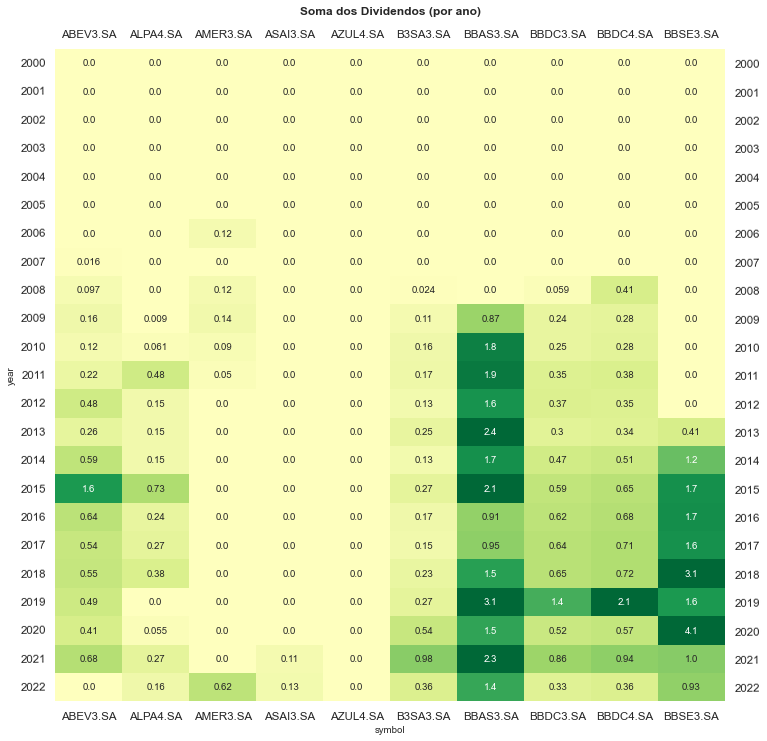

In [22]:
NUMBER_BASE = 0

#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

ax = sns.heatmap(df_pivot_dividends.iloc[:, 0:10], 
                 annot=True, 
                 fmt='.2', 
                 cmap='RdYlGn', 
                 vmin=NUMBER_BASE - 2, 
                 vmax=NUMBER_BASE + 2, 
                 center=NUMBER_BASE, 
                 cbar=False)

ax.set_title(f'Soma dos Dividendos (por ano)', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90, labelsize='large')
ax.tick_params(axis = "x", labeltop=True, labelsize='large')